<a href="https://colab.research.google.com/github/OscarAliM/Matematicas_y_Ciencia_de_Datos_2024/blob/main/Fase_3_y_4_limpieza%2C_preparaci%C3%B3n_de_los_datos_y_modelaci%C3%B3n_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Fase 3 y 4: limpieza, preparación de los datos y modelación de los datos.***


**Cargando y explorando los datos**

Con el archivo en Colab, utilizaremos la librería Pandas para cargar los datos en un DataFrame.



**Exploración de datos**



1. Crea una celda de código nueva para cada línea de código e iremos escribiendo y corriendo una por una para detectar posibles errores además de ver los resultados al ir avanzando.

In [70]:
# Paso 1

2. Crea la variable datos_consumo (usa ese nombre para el Data Frame) para cargar el archivo con la función read_excel de la librería Pandas:

In [71]:
# Paso 2
import pandas as pd

3. Usa la función head() o tail() para comprobar que los datos se cargaron correctemente en el dataframe viendo 3 registros.

In [72]:
# Paso 3
datos_consumo = pd.read_excel("A01736492_Actividad2_Registro.xlsx")
# Mostrar las primeras 3 filas del DataFrame para verificar que se cargó correctamente
print("Primeros 3 registros del DataFrame:")
print(datos_consumo.head(3))

# Mostrar las últimas 3 filas del DataFrame para verificar que se cargó correctamente
print("\nÚltimos 3 registros del DataFrame:")
print(datos_consumo.tail(3))

Primeros 3 registros del DataFrame:
    Momento   Nombre alimento  Calorías  Carbohidratos  Lípidos  Proteína  \
0  Desayuno      Carne de Res     0.135            0.0     4.62     21.91   
1    Comida      Carne de Res     0.135            0.0     4.62     21.91   
2      Cena  Pechuga de Pollo     0.195            0.0     7.72     29.55   

   Sodio  
0   57.0  
1   57.0  
2  393.0  

Últimos 3 registros del DataFrame:
      Momento                      Nombre alimento  Calorías  Carbohidratos  \
352  Desayuno  Salmón con quinoa y verduras asadas     150.0           25.0   
353    Comida              Sopa de frijoles negros     150.0           25.0   
354    Comida                     Sopa de lentejas     250.0           15.0   

     Lípidos  Proteína  Sodio  
352     25.0      30.0  375.0  
353     15.0      20.0  200.0  
354     10.0      20.0  200.0  


4. Realiza una agrupación de los datos por Momento y cuénta cuantos elementos diferentes hay por momento. Interpreta lo que obtuviste

In [73]:
# Paso 4
conteo_por_momento = datos_consumo.groupby('Momento').size()
print(conteo_por_momento)

Momento
Cena         56
Colacion     73
Comida      101
Desayuno     85
Snack        40
dtype: int64


5. Usa una función para obtener la estadística descriptiva y completar la exploración de nuestros datos. Interpreta lo que obtuviste

In [74]:
# Paso 5
descripcion_estadistica = datos_consumo.describe()
print(descripcion_estadistica)

         Calorías  Carbohidratos     Lípidos    Proteína        Sodio
count  355.000000     355.000000  355.000000  355.000000   355.000000
mean    90.263062      24.244958   10.759296   16.373465   156.829017
std    178.339898      27.287536   18.134950   38.988336   294.939781
min      0.000000       0.000000    0.000000    0.000000     0.000000
25%      0.110000       9.000000    0.355000    1.660000     0.190000
50%      0.204000      19.000000    7.720000   10.000000    10.000000
75%      1.884000      30.000000   15.000000   21.910000   205.500000
max    675.000000     152.800000  180.000000  480.000000  2294.000000


**Seleccionando los datos**

6. Crea una variable datos para asignarle el DafaFrame que contendrá solo los datos que analizaremos, utilizamos la función iloc[ ] para seleccionar los elementos de acuerdo a su ubicación. Su sintaxis es iloc[<filas>, <columnas>] o bien la función loc[ ] para seleccionar de acuerdo a su nombre.

In [75]:
# Paso 6
datos = datos_consumo.iloc[:, 2:]  # Seleccionando todas las filas y las columnas a partir de la tercera
print(datos.head())


   Calorías  Carbohidratos  Lípidos  Proteína  Sodio
0     0.135            0.0     4.62     21.91   57.0
1     0.135            0.0     4.62     21.91   57.0
2     0.195            0.0     7.72     29.55  393.0
3     0.135            0.0     4.62     21.91   57.0
4     0.135            0.0     4.62     21.91   57.0


7. Con la función info() vemos la información completa de los datos del nuevo dataframe, ya solo debemos tener los valores numéricos.

In [76]:
# Paso 7
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Calorías       355 non-null    float64
 1   Carbohidratos  355 non-null    float64
 2   Lípidos        355 non-null    float64
 3   Proteína       355 non-null    float64
 4   Sodio          355 non-null    float64
dtypes: float64(5)
memory usage: 14.0 KB


**Limpiando los datos**

8. Usando la función isnull()  buscamos valores nulos y obtenemos True o False dependiendo si hay o no

In [77]:
# Paso 8
valores_nulos = datos.isnull()
print(valores_nulos.head())

   Calorías  Carbohidratos  Lípidos  Proteína  Sodio
0     False          False    False     False  False
1     False          False    False     False  False
2     False          False    False     False  False
3     False          False    False     False  False
4     False          False    False     False  False


9. Usando la función dropna() creamos un nuevo dataframe descartando los valores nulos o vacíos de nuestro dataframe datos_seleccionados

In [78]:
# Paso 9
datos_limpios = datos.dropna()
print(datos_limpios.head())

   Calorías  Carbohidratos  Lípidos  Proteína  Sodio
0     0.135            0.0     4.62     21.91   57.0
1     0.135            0.0     4.62     21.91   57.0
2     0.195            0.0     7.72     29.55  393.0
3     0.135            0.0     4.62     21.91   57.0
4     0.135            0.0     4.62     21.91   57.0


10. Validamos que no tenemos valores nulos en ninguna columna, todos deben dar cero .isnull().sum()

In [79]:
# Paso 10
print(datos_limpios.isnull().sum())

Calorías         0
Carbohidratos    0
Lípidos          0
Proteína         0
Sodio            0
dtype: int64


**Preparando los datos**

11. Asigna los atributos a las variables en nuestros datos. La variable X contiene los atributos de entrada y la variable Y los atributos de salida.

In [80]:
# Paso 11
X = datos_limpios.iloc[:, 1:]  # Atributos de entrada
Y = datos_limpios.iloc[:, 0]   # Atributos de salida

12. Ahora se dividen nuestros datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%). Con los datos de entrenamiento realizamos el aprendizaje automático y con los datos de prueba realizamos la validación.

In [81]:
# Paso 12
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Modelación de los datos

13. De la librería SciKit-Learn importamos  la clase de regresión lineal y crearemos un objeto de esa clase, que será nuestro modelo de regresión lineal.

In [82]:
# Paso 13
from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()

14. Ya con el modelo, utilizaremos la función fit() para "ajustar" el modelo a nuestro conjunto de datos. Esto permite al modelo "estudiar" nuestros datos y "aprender" de ellos.

In [83]:
# Paso 14
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

15. En este punto, el algorítmo ya ha aprendido cuales son los coeficientes de X óptimos para satisfacer el modelo. (Interpreta que variable es la de mayor y menor peso en tu modelo y ve si son las mismas que observaste en los diagramas de dispersión). Para verlos copiamos el siguiente código:

x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
coeff_df

In [84]:
# Paso 15
x_columns = ['Carbohidratos (g)', 'Lípidos/grasas (g)', 'Proteína (g)', 'Sodio (mg)']
coeff_df = pd.DataFrame(modelo_regresion.coef_, x_columns, columns=['Coeficientes'])
print(coeff_df)

                    Coeficientes
Carbohidratos (g)       0.380822
Lípidos/grasas (g)      1.542006
Proteína (g)           -0.577697
Sodio (mg)              0.045438


16. Despliega la ecuación de regresión del modelo que obtuviste.

In [85]:
# Paso 16
intercepto = modelo_regresion.intercept_
print("Ecuación de regresión:")
print("Calorías =", intercepto, "+", modelo_regresion.coef_[0], "* Carbohidratos +", modelo_regresion.coef_[1], "* Lípidos +", modelo_regresion.coef_[2], "* Proteína +", modelo_regresion.coef_[3], "* Sodio")

Ecuación de regresión:
Calorías = 62.59116385700876 + 0.380821986302208 * Carbohidratos + 1.5420063746566715 * Lípidos + -0.5776968907839678 * Proteína + 0.04543774732289285 * Sodio


17. Ahora que hemos creado nuestro modelo y lo hemos entrenado, es hora de probar el modelo con nuestro conjunto de datos de prueba.

In [86]:
# Paso 17
Y_pred = modelo_regresion.predict(X_test)

18. Revisa la diferencia entre los valores actuales y los valores de predicción en la comparación. Realiza la comparación con los 25 primeros valores.

In [87]:
# Paso 18
diferencia = Y_test - Y_pred
print(diferencia[:25])

227   -133.415185
42     -66.980220
256    -68.049721
182    -68.051202
56    -111.722843
332    560.821659
15     -75.086545
57     -75.254037
140    -69.306630
294    123.315559
82     -88.926679
168    -82.079747
351    339.997656
309    413.030501
119    -66.912871
333    405.320469
317    170.079362
145    -69.865141
339    106.800279
299    382.992745
126   -100.281387
219    -68.005809
239    -83.373759
33    -148.381668
158    -63.525928
Name: Calorías, dtype: float64


19. Usamos la función describe() para obtener la estadística descriptiva de la columna Diferencia.

In [88]:
# Paso 19
print(diferencia.describe())

count     71.000000
mean      20.904625
std      191.530319
min     -148.381668
25%      -82.860285
50%      -69.306630
75%       67.592437
max      560.821659
Name: Calorías, dtype: float64


20. Calcula el coeficiente de determinación R2 para comprobar la precisión de nuestro modelo, mientras mayor sea el R2, mejor será el ajuste del modelo a los datos. Nuestro objetivo es un valor lo más cercano a 1 (100%), que nos indica que tanto se ajusta el modelo a nuestros datos, es decir, que porcentaje de calorías explicado por la regresión.

In [89]:
# Paso 20
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, Y_pred)
print("Coeficiente de determinación R2:", r2)

Coeficiente de determinación R2: 0.015015014265236992


**Visualización de los datos **

21. Antes del paso 11 realiza una gráfica de subplot que contenga la correlación de cada uno de los datos de entrada X con el dato de salida Y, dale formato que incluya el nombre de los ejes y el título general de la gráfica y establece si alguna variable es eliminable del modelo de acuerdo a las gráficas.

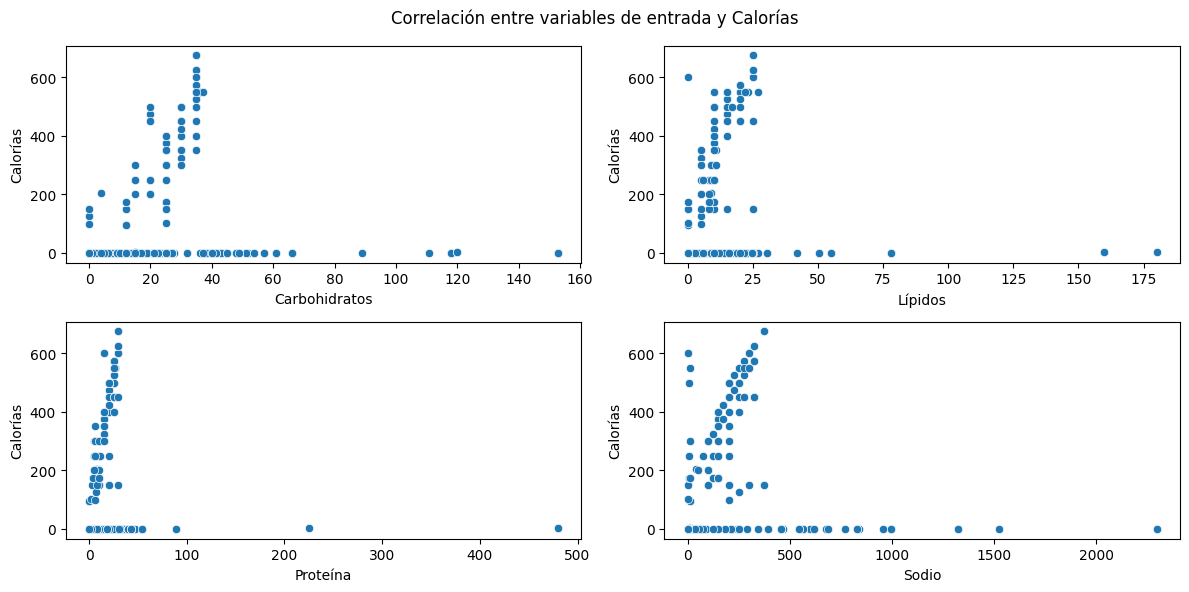

In [90]:
# Paso 21
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=col, y='Calorías', data=datos_limpios)
    plt.xlabel(col)
    plt.ylabel('Calorías')
plt.suptitle('Correlación entre variables de entrada y Calorías')
plt.tight_layout()
plt.show()


22. Ahora toca realizar los gráficos para la visualización de los datos para hacer la comparación de valores actuales, de predicción y la diferencia (usa una gráfico de barras) y estimar de manera visual que tan preciso o no es nuestro modelo para calcular calorías.  Para esto importamos la librería matplotlib.

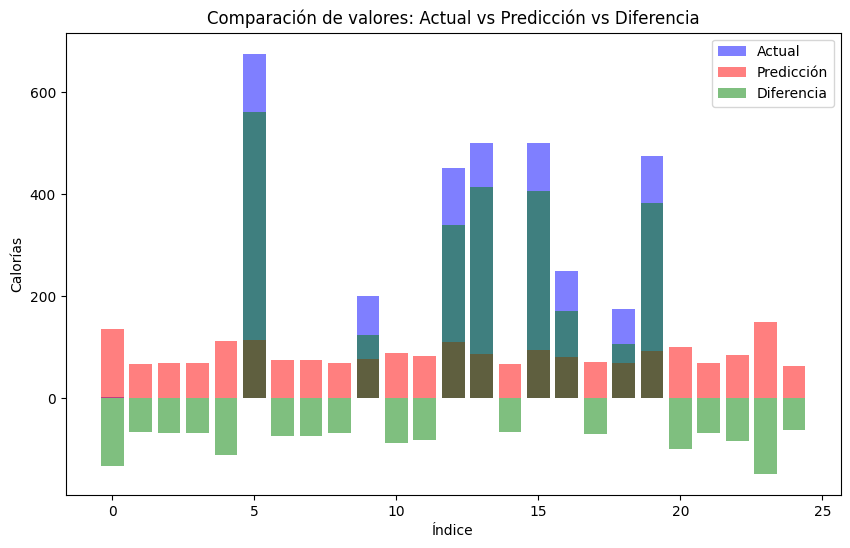

In [91]:
# Paso 22
plt.figure(figsize=(10, 6))
indices = range(len(Y_pred[:25]))
plt.bar(indices, Y_test[:25], color='b', alpha=0.5, label='Actual')
plt.bar(indices, Y_pred[:25], color='r', alpha=0.5, label='Predicción')
plt.bar(indices, diferencia[:25], color='g', alpha=0.5, label='Diferencia')
plt.xlabel('Índice')
plt.ylabel('Calorías')
plt.title('Comparación de valores: Actual vs Predicción vs Diferencia')
plt.legend()
plt.show()